In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk

In [59]:
# read in data - here I took the same categories as we had in the lesson
categories = ['soc.religion.christian', 'comp.graphics', 'sci.med', 'comp.windows.x', 'sci.space', 'alt.atheism']
newsgroup_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)
newsgroup_test = fetch_20newsgroups(subset='test', categories=categories)

In [78]:
print(stop_words)

{'d', 'shouldn', 'ain', 'to', "you'll", 'aren', 'doing', 'were', 'ours', 'it', 'into', "couldn't", 'mightn', 'would', 'your', 'too', "you're", 'further', 'be', 'here', 'those', 'did', 'how', 'who', 'these', 'down', 'at', 'once', 'what', 'or', 'nor', 'herself', 'does', "hasn't", "it's", 'wasn', 'only', 'he', "you'd", 'his', 's', 'and', 'an', 'has', 'been', 'for', 'both', 'above', 'this', 'our', 'very', 'hers', 'all', "needn't", 'so', 'up', 'then', 'doesn', 'most', 'yourself', 'same', "wouldn't", 't', "weren't", 'by', 'any', 'her', 'the', 'are', 'until', "aren't", "wasn't", 'hadn', 'made', 'out', 'myself', "you've", 'if', 'isn', 'couldn', 'being', 'm', 'some', 'we', 'before', 'do', "should've", 'think', 'them', "isn't", 'which', 'between', 'on', 'whom', 'will', 'in', 'themselves', "doesn't", 'under', 'can', 'should', 'own', 'about', 'from', 'just', 'me', 'needn', 'o', 'such', 'than', 'yourselves', 'didn', 'himself', 'because', 'subject', "that'll", 'off', 'again', 'few', 'll', 'my', 'eac

In [89]:
stop_words.update(['find','would','be','one','say','made','think','subject','see','fnal','articl','feel','given','led',
                  'view','way','either','however'])

In [90]:
# get rid of stop words e.g. with nltk
ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

newsgroup_trainN = []
i = 0
for message in newsgroup_train.data:
    text_token = tokenizer.tokenize(message)
    messageN = ''
    for word in text_token:
        word = word.lower()
        if word not in stop_words:
            messageN = messageN + ' ' + ps.stem(word)
    newsgroup_trainN.append(messageN)
newsgroup_train.data = newsgroup_trainN

In [91]:
newsgroup_train.data[0]

' rexlex gov athiest hell organ ad net line 157 may 6 00 35 31 1993 15453 geneva rutger edu sun075 gerri palo uunet uu net gerri palo write adam eve golgotha whole process fall man occur involv gradual dim consciou spiritu world preci point theolog bent live immedi flood noah ham son cush son nimrod much stronger appreci divin wrath also stronger understand true god fact immediaci cau hardship much atla seen heaven rest shoulder mere physic heaven lift put god strict spiritu law distanc thu becam elev heaven god men abl heaven afar god heaven could dark cloud regard displeasur breaker law interest titl emancip deliv phoroneu nimrod invad patriarch system abridg liberti mankind yet worship mani benefit deliv right christ deliv deliv consciou god wrath actual perform deliveri god wrath us accept true question happen human die christ ever present christian readi consign adam abraham even cain etern damnat problem time adam look forward come anoint put faith fact god provi account righteou

In [44]:
# tokenize words
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(newsgroup_train.data)

# get size of vocabulary 
# 1 needs to be added because of resrver 0 index
vocab_size = len(tokenizer.word_index) + 1

X_train = tokenizer.texts_to_sequences(newsgroup_train.data)
X_test = tokenizer.texts_to_sequences(newsgroup_test.data)

In [45]:
# padding
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [46]:
# embedding layer

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           1866250   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,916,271
Trainable params: 1,916,271
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, newsgroup_train.target,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, newsgroup_test.target),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, newsgroup_train.target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, newsgroup_test.target, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 3443 samples, validate on 2291 samples
Epoch 1/20
3443/3443 [==============================] - 15s 4ms/sample - loss: -5774.6474 - accuracy: 0.1696 - val_loss: -19062.9557 - val_accuracy: 0.1698
Epoch 2/20
3443/3443 [==============================] - 15s 4ms/sample - loss: -45284.7431 - accuracy: 0.1696 - val_loss: -93715.7001 - val_accuracy: 0.1698
Epoch 3/20
 900/3443 [======>.......................] - ETA: 10s - loss: -102084.4306 - accuracy: 0.1656

KeyboardInterrupt: 

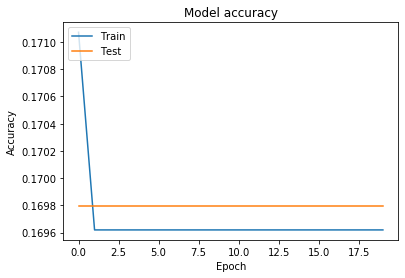

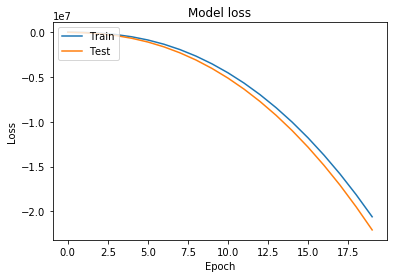

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           2479750   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,480,271
Trainable params: 2,480,271
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, newsgroup_train.target,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, newsgroup_test.target),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, newsgroup_train.target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, newsgroup_test.target, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 3443 samples, validate on 2291 samples
Epoch 1/20
3443/3443 [==============================] - 21s 6ms/sample - loss: -15.9479 - accuracy: 0.1696 - val_loss: -68.9446 - val_accuracy: 0.1698
Epoch 2/20
3443/3443 [==============================] - 20s 6ms/sample - loss: -284.0072 - accuracy: 0.1696 - val_loss: -629.9945 - val_accuracy: 0.1698
Epoch 3/20
3443/3443 [==============================] - 19s 6ms/sample - loss: -1286.0372 - accuracy: 0.1696 - val_loss: -2137.9051 - val_accuracy: 0.1698
Epoch 4/20
3443/3443 [==============================] - 18s 5ms/sample - loss: -3379.8971 - accuracy: 0.1696 - val_loss: -4864.3824 - val_accuracy: 0.1698
Epoch 5/20
3443/3443 [==============================] - 20s 6ms/sample - loss: -6781.8626 - accuracy: 0.1696 - val_loss: -8970.7023 - val_accuracy: 0.1698
Epoch 6/20
3443/3443 [==============================] - 20s 6ms/sample - loss: -11651.7512 - accuracy: 0.1696 - val_loss: -14633.6086 - val_accuracy: 0.1698
Epoch 7/20
3443/3443 [====

KeyboardInterrupt: 

In [ ]:
# pre-trained word embedding?


In [51]:
# use CNN

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          3732500   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 3,797,929
Trainable params: 3,797,929
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, newsgroup_train.target,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, newsgroup_test.target),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, newsgroup_train.target, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, newsgroup_test.target, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 3443 samples, validate on 2291 samples
Epoch 1/20
3443/3443 [==============================] - 32s 9ms/sample - loss: -9616.1764 - accuracy: 0.1702 - val_loss: -53848.9591 - val_accuracy: 0.1698
Epoch 2/20
3443/3443 [==============================] - 32s 9ms/sample - loss: -387039.5266 - accuracy: 0.1696 - val_loss: -986315.3345 - val_accuracy: 0.1698
Epoch 3/20
3443/3443 [==============================] - 31s 9ms/sample - loss: -2575535.9349 - accuracy: 0.1696 - val_loss: -4697390.2393 - val_accuracy: 0.1698
Epoch 4/20
3443/3443 [==============================] - 31s 9ms/sample - loss: -8960421.6248 - accuracy: 0.1696 - val_loss: -13807714.4877 - val_accuracy: 0.1698
Epoch 5/20
1160/3443 [=========>....................] - ETA: 17s - loss: -16641870.4435 - accuracy: 0.1704

KeyboardInterrupt: 

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()